In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
#read the file
original_data=pd.read_csv("resources/gdp_over_hours_worked.csv")
original_data.head()

,iso2c,year,country,iso3c,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,...,employed,total_hours_alternative,gdp_over_k_hours_worked,gdp_ppp_over_k_hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
0,1A,1980,Arab World,ARB,167707208.0,NaN,NaN,NaN,4.598046e+11,8.594801e+11,...,NaN,NaN,NaN,NaN,2741.710413,NaN,NaN,NaN,5124.884863,NaN
1,1A,1981,Arab World,ARB,173118753.0,NaN,NaN,NaN,4.748121e+11,8.884793e+11,...,NaN,NaN,NaN,NaN,2742.696180,NaN,NaN,NaN,5132.195612,NaN
2,1A,1982,Arab World,ARB,178587926.0,NaN,NaN,NaN,4.445759e+11,8.148883e+11,...,NaN,NaN,NaN,NaN,2489.394893,NaN,NaN,NaN,4562.952771,NaN
3,1A,1983,Arab World,ARB,184342569.0,NaN,NaN,NaN,4.184621e+11,7.643004e+11,...,NaN,NaN,NaN,NaN,2270.024076,NaN,NaN,NaN,4146.087134,NaN
4,1A,1984,Arab World,ARB,190162096.0,NaN,NaN,NaN,4.258994e+11,7.744464e+11,...,NaN,NaN,NaN,NaN,2239.665131,NaN,NaN,NaN,4072.559255,NaN


In [3]:
#G7 Countries Data -> Narrowed down to useful columns and renamed them.
gdp_data = original_data.loc[:, ["year", "country", "pop", "labor_force", "gdp", "unemployment_r"]]
gdp_data.rename(columns={'year': 'Year', 'country': 'Country', 'labor_force' : 'Labor Force', 'gdp': 'GDP', 
                                 'pop' : 'Population', 'unemployment_r' : 'Unemployment Rate'}, inplace=True)

g7_countries = ['United States', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy', 'Canada']

gdp_data_g7 = gdp_data[(gdp_data['Year']>= 1992) & (gdp_data['Country'].isin(g7_countries))]
gdp_data_g7["GDP"]=round(gdp_data["GDP"]/1000000000,2)
gdp_data_g7.rename(columns={'GDP': 'GDP in Billions'}, inplace=True)

gdp_data_g7.head()

,Year,Country,Population,Labor Force,GDP in Billions,Unemployment Rate
1603,1992,Canada,28371264.0,14782203.0,594.38,11.20
1604,1993,Canada,28684764.0,14871263.0,579.06,11.38
1605,1994,Canada,29000663.0,15013489.0,579.94,10.40
1606,1995,Canada,29302311.0,15119721.0,605.94,9.49
1607,1996,Canada,29610218.0,15278818.0,630.60,9.62


In [4]:
#Top 10 Countries Data -> Narrowed down to useful columns and renamed them.
gdp_data = original_data.loc[:, ["year", "country", "pop", "labor_force", "gdp", "unemployment_r"]]
gdp_data.rename(columns={'year': 'Year', 'country': 'Country', 'labor_force' : 'Labor Force', 'gdp': 'GDP', 
                                 'pop' : 'Population', 'unemployment_r' : 'Unemployment Rate'}, inplace=True)

top_10_countries = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 
                    'France', 'Italy', 'Canada', 'Russian Federation']

gdp_data = gdp_data[(gdp_data['Year']>= 1992) & (gdp_data['Country'].isin(top_10_countries))]
gdp_data["GDP"]=round(gdp_data["GDP"]/1000000000,2)
gdp_data.rename(columns={'GDP': 'GDP in Billions'}, inplace=True)

gdp_data.head()

,Year,Country,Population,Labor Force,GDP in Billions,Unemployment Rate
1603,1992,Canada,28371264.0,14782203.0,594.38,11.20
1604,1993,Canada,28684764.0,14871263.0,579.06,11.38
1605,1994,Canada,29000663.0,15013489.0,579.94,10.40
1606,1995,Canada,29302311.0,15119721.0,605.94,9.49
1607,1996,Canada,29610218.0,15278818.0,630.60,9.62


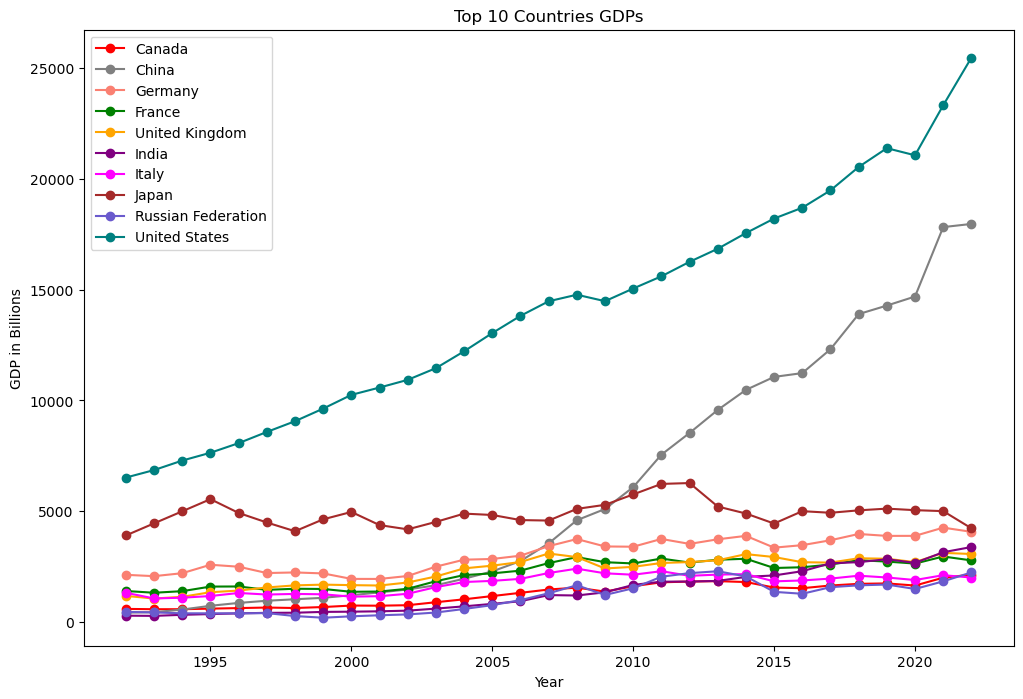

In [5]:
plt.figure(figsize=(12, 8))
unique_countries = gdp_data['Country'].unique()
colors = {'France':'green', 'Germany':'salmon', 'Italy':'fuchsia', 'Japan':'brown', 
          'United Kingdom':'orange', 'United States':'teal','China':'gray', 
          'Russian Federation':'slateblue', 'India':'purple', 'Canada':'red'}

for country in unique_countries:
    country_data = gdp_data[gdp_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP in Billions'], marker='o', linestyle='-', 
             label=country, color=colors[country])

plt.xlabel('Year')
plt.ylabel('GDP in Billions')
plt.title('Top 10 Countries GDPs')
plt.legend()
plt.show()

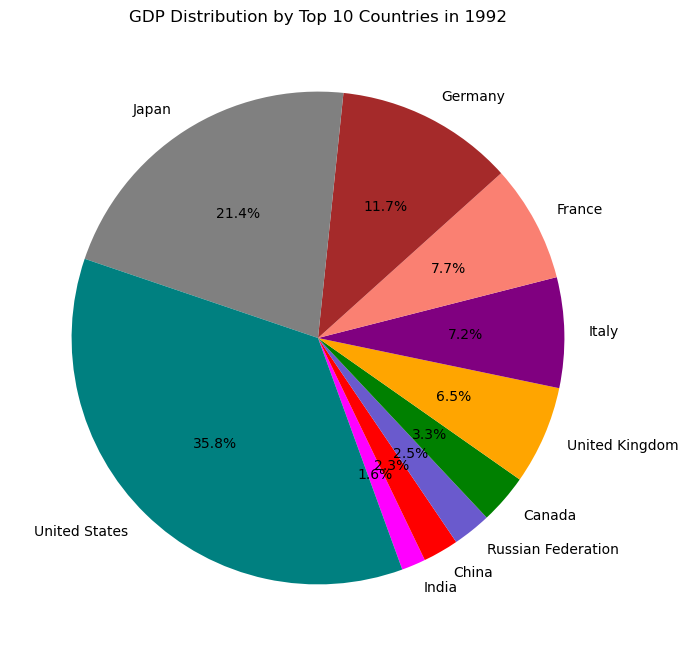

In [6]:
#Looked at GDP in 1992 for the top 10 Countries
data_1992 = gdp_data[gdp_data['Year']==1992]
plt.figure(figsize=(12, 8))
sorted_data_1992 = data_1992.sort_values(by='GDP in Billions')
colors10=['fuchsia', 'red', 'slateblue', 'green', 'orange', 'purple', 'salmon', 'brown', 'gray', 'teal']
#colors7=['red', 'salmon', 'green', 'orange', 'fuchsia', 'brown', 'teal']
plt.pie(sorted_data_1992['GDP in Billions'], labels=sorted_data_1992['Country'], autopct='%1.1f%%', 
        startangle=290, colors=colors10)
plt.title('GDP Distribution by Top 10 Countries in 1992')
plt.show()

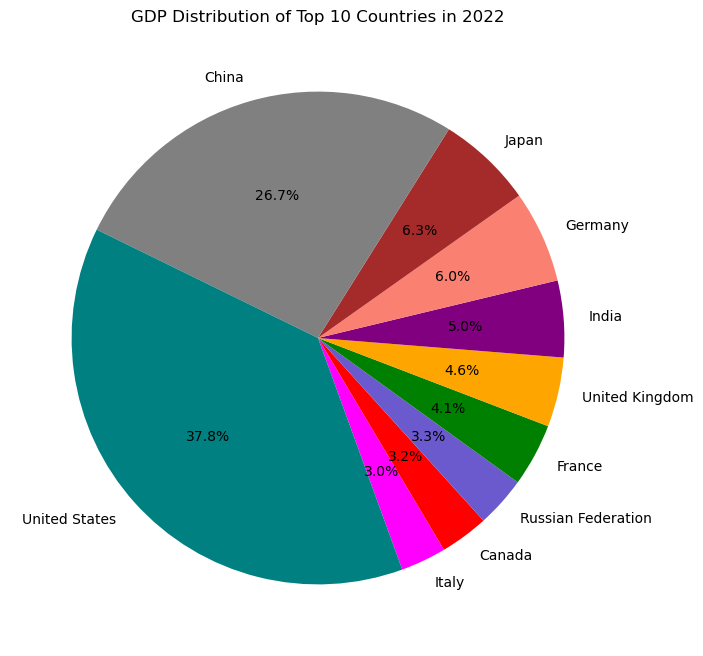

In [7]:
#Looked at GDP in 2022 for the top 10 Countries
data_2022 = gdp_data[gdp_data['Year']==2022]
plt.figure(figsize=(12, 8))
sorted_data_2022 = data_2022.sort_values(by='GDP in Billions')
colors10=['fuchsia', 'red', 'slateblue', 'green', 'orange', 'purple', 'salmon', 'brown', 'gray', 'teal']
plt.pie(sorted_data_2022['GDP in Billions'], labels=sorted_data_2022['Country'], autopct='%1.1f%%', 
        startangle=290, colors=colors10)
plt.title('GDP Distribution of Top 10 Countries in 2022')
plt.show()

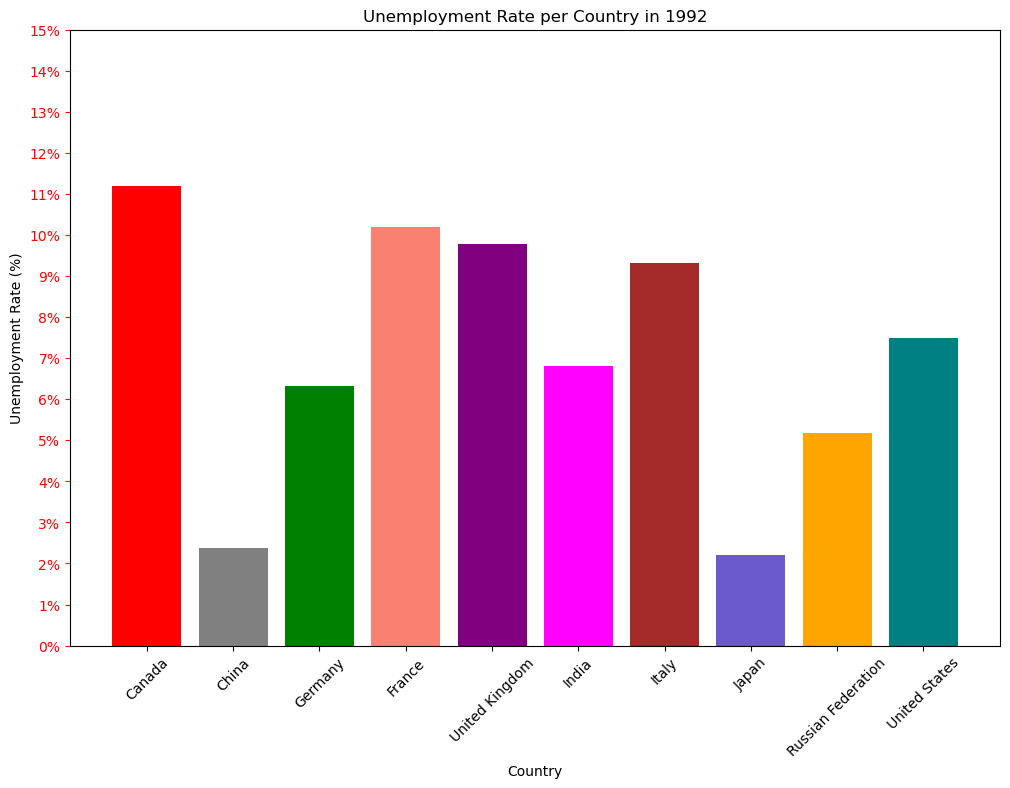

In [8]:
#Creation of an Unemployment Rate per Country for 1992
plt.figure(figsize=(12, 8))
plt.bar(data_1992['Country'], data_1992['Unemployment Rate'], color=['red', 'gray', 'green', 'salmon', 'purple',
                                                                     'fuchsia', 'brown', 'slateblue', 'orange', 'teal'])
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.tick_params('y', colors='red')
plt.xticks(rotation=45)
plt.yticks(range(0,16), labels=(f'{i}%' for i in range(0,16)))
plt.title('Unemployment Rate per Country in 1992')
plt.show()

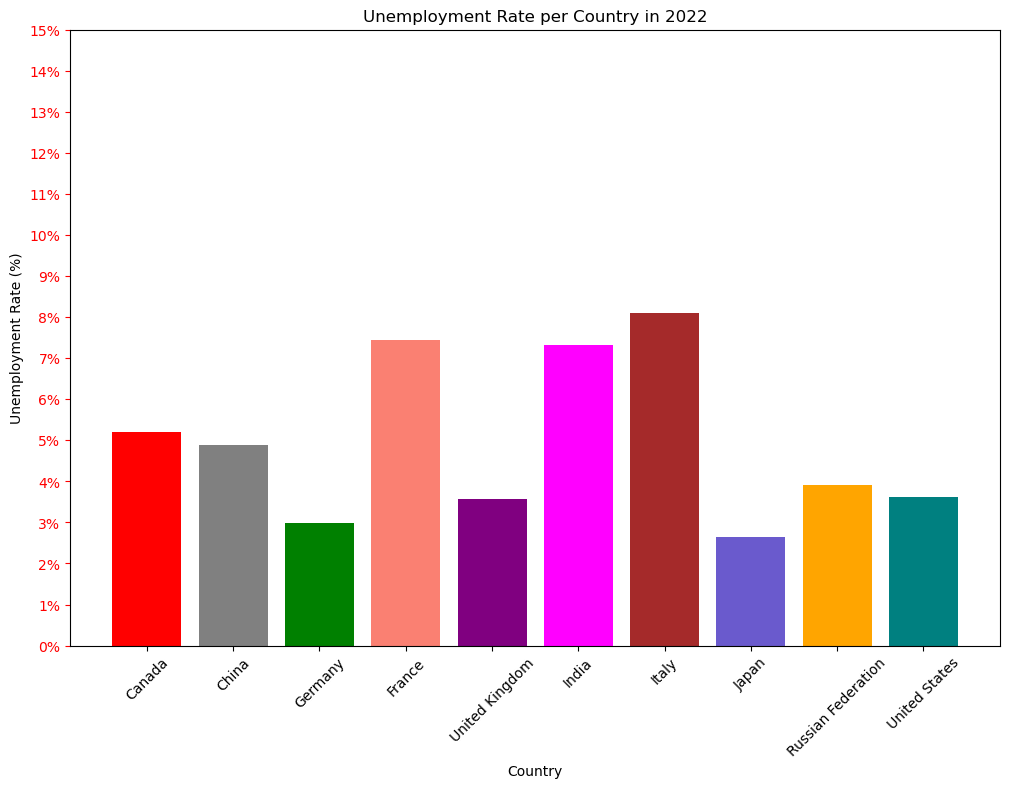

In [9]:
#Creation of an Unemployment Rate per Country for 2022
plt.figure(figsize=(12, 8))
plt.bar(data_2022['Country'], data_2022['Unemployment Rate'], color=['red', 'gray', 'green', 'salmon', 'purple',
                                                                     'fuchsia', 'brown', 'slateblue', 'orange', 'teal'])
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.tick_params('y', colors='red')
plt.xticks(rotation=45)
plt.yticks(range(0,16), labels=(f'{i}%' for i in range(0,16)))
plt.title('Unemployment Rate per Country in 2022')
plt.show()

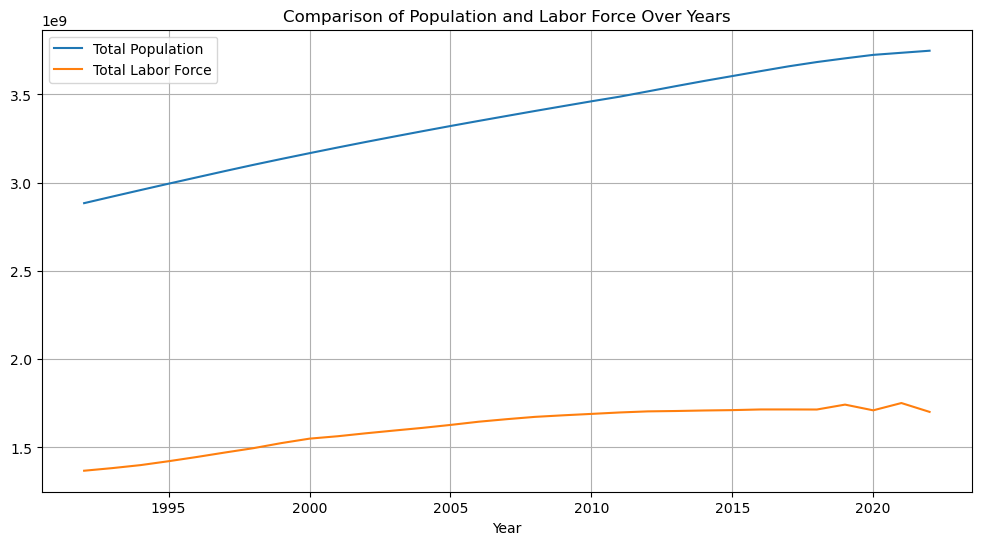

In [10]:
population_data = gdp_data[['Country', 'Year', 'Population']]
labor_force_data = gdp_data[['Country', 'Year', 'Labor Force']]


total_population = population_data.groupby('Year')['Population'].sum()
total_labor_force = labor_force_data.groupby('Year')['Labor Force'].sum()

plt.figure(figsize=(12, 6))

plt.plot(total_population.index, total_population, label='Total Population')
plt.plot(total_labor_force.index, total_labor_force, label='Total Labor Force')

plt.title('Comparison of Population and Labor Force Over Years')
plt.xlabel('Year')
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()

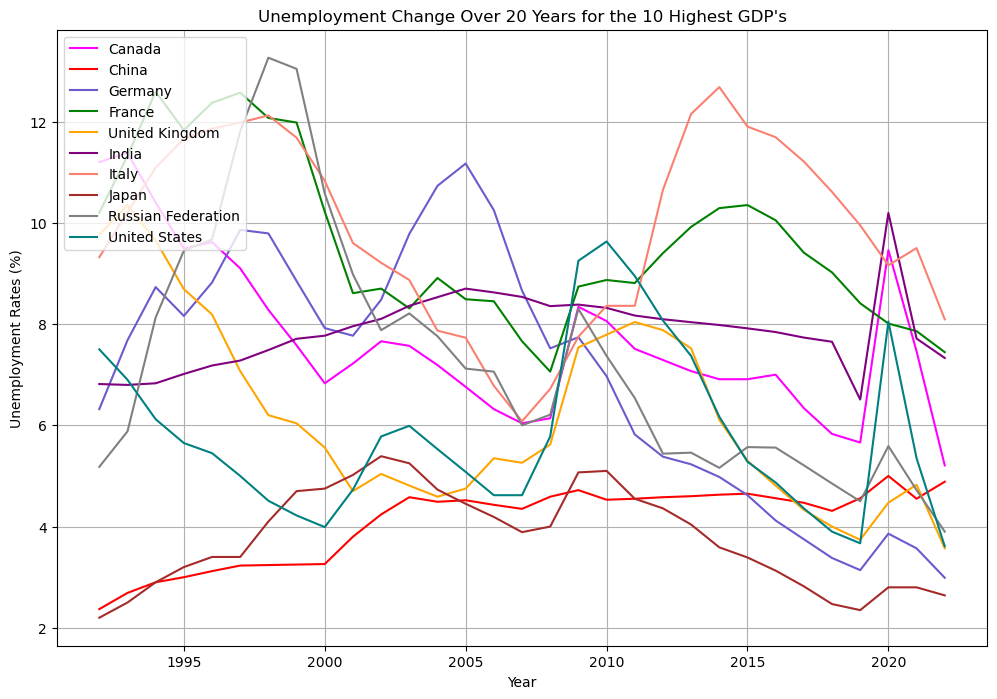

In [11]:
#Make a graph that shows Unemployment Change Rate
df_pivot = gdp_data.pivot(index='Year', columns='Country', values='Unemployment Rate')
plt.figure(figsize=(12, 8))
for country, color in zip(gdp_data['Country'].unique(), colors10):
    plt.plot(df_pivot.index, df_pivot[country], label=country, color=color)
plt.title("Unemployment Change Over 20 Years for the 10 Highest GDP's")
plt.xlabel('Year')
plt.ylabel('Unemployment Rates (%)')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

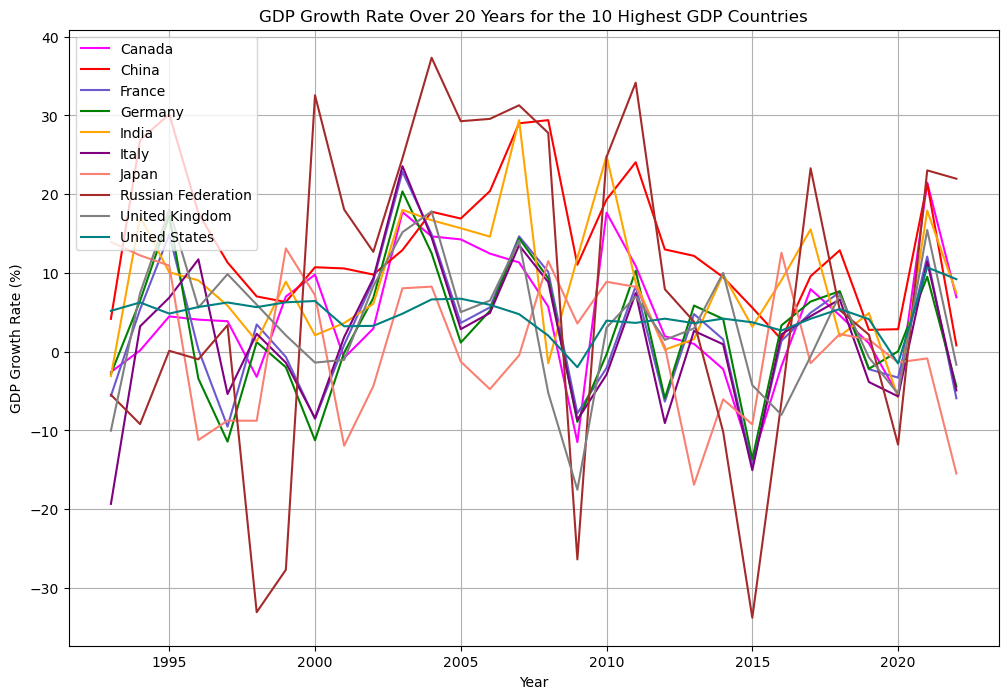

In [12]:
#Creation of a GDP Growth Rate graph
gdp_data.sort_values(by=['Country', 'Year'], inplace=True)

gdp_data['GDP Growth Rate'] = (
    gdp_data.groupby('Country')['GDP in Billions'].pct_change() * 100)

df_pivot_growth_rate = gdp_data.pivot(index='Year', columns='Country', values='GDP Growth Rate')

plt.figure(figsize=(12, 8))
for country, color in zip(gdp_data['Country'].unique(), colors10):
    plt.plot(df_pivot_growth_rate.index, df_pivot_growth_rate[country], label=country, color=color)

plt.title("GDP Growth Rate Over 20 Years for the 10 Highest GDP Countries")
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

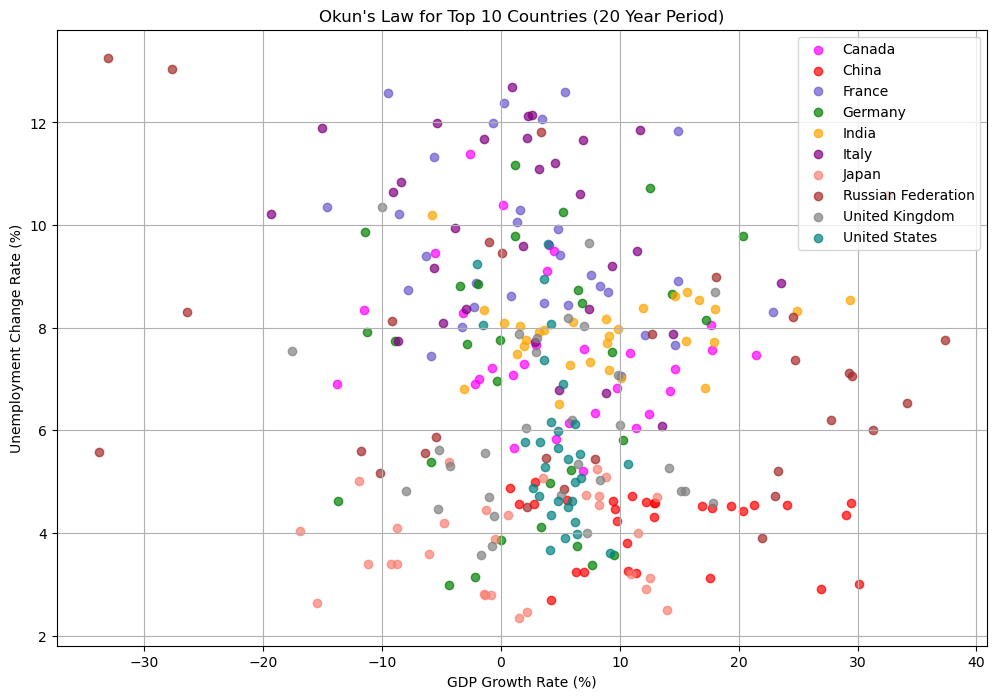

In [13]:
plt.figure(figsize=(12, 8))

for country, color in zip(gdp_data['Country'].unique(), colors10):
    plt.scatter(
        x=gdp_data[gdp_data['Country'] == country]['GDP Growth Rate'],
        y=gdp_data[gdp_data['Country'] == country]['Unemployment Rate'],
        label=country,
        color=color,
        alpha=0.7
    )

plt.title("Okun's Law for Top 10 Countries (20 Year Period)")
plt.xlabel("GDP Growth Rate (%)")
plt.ylabel("Unemployment Change Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

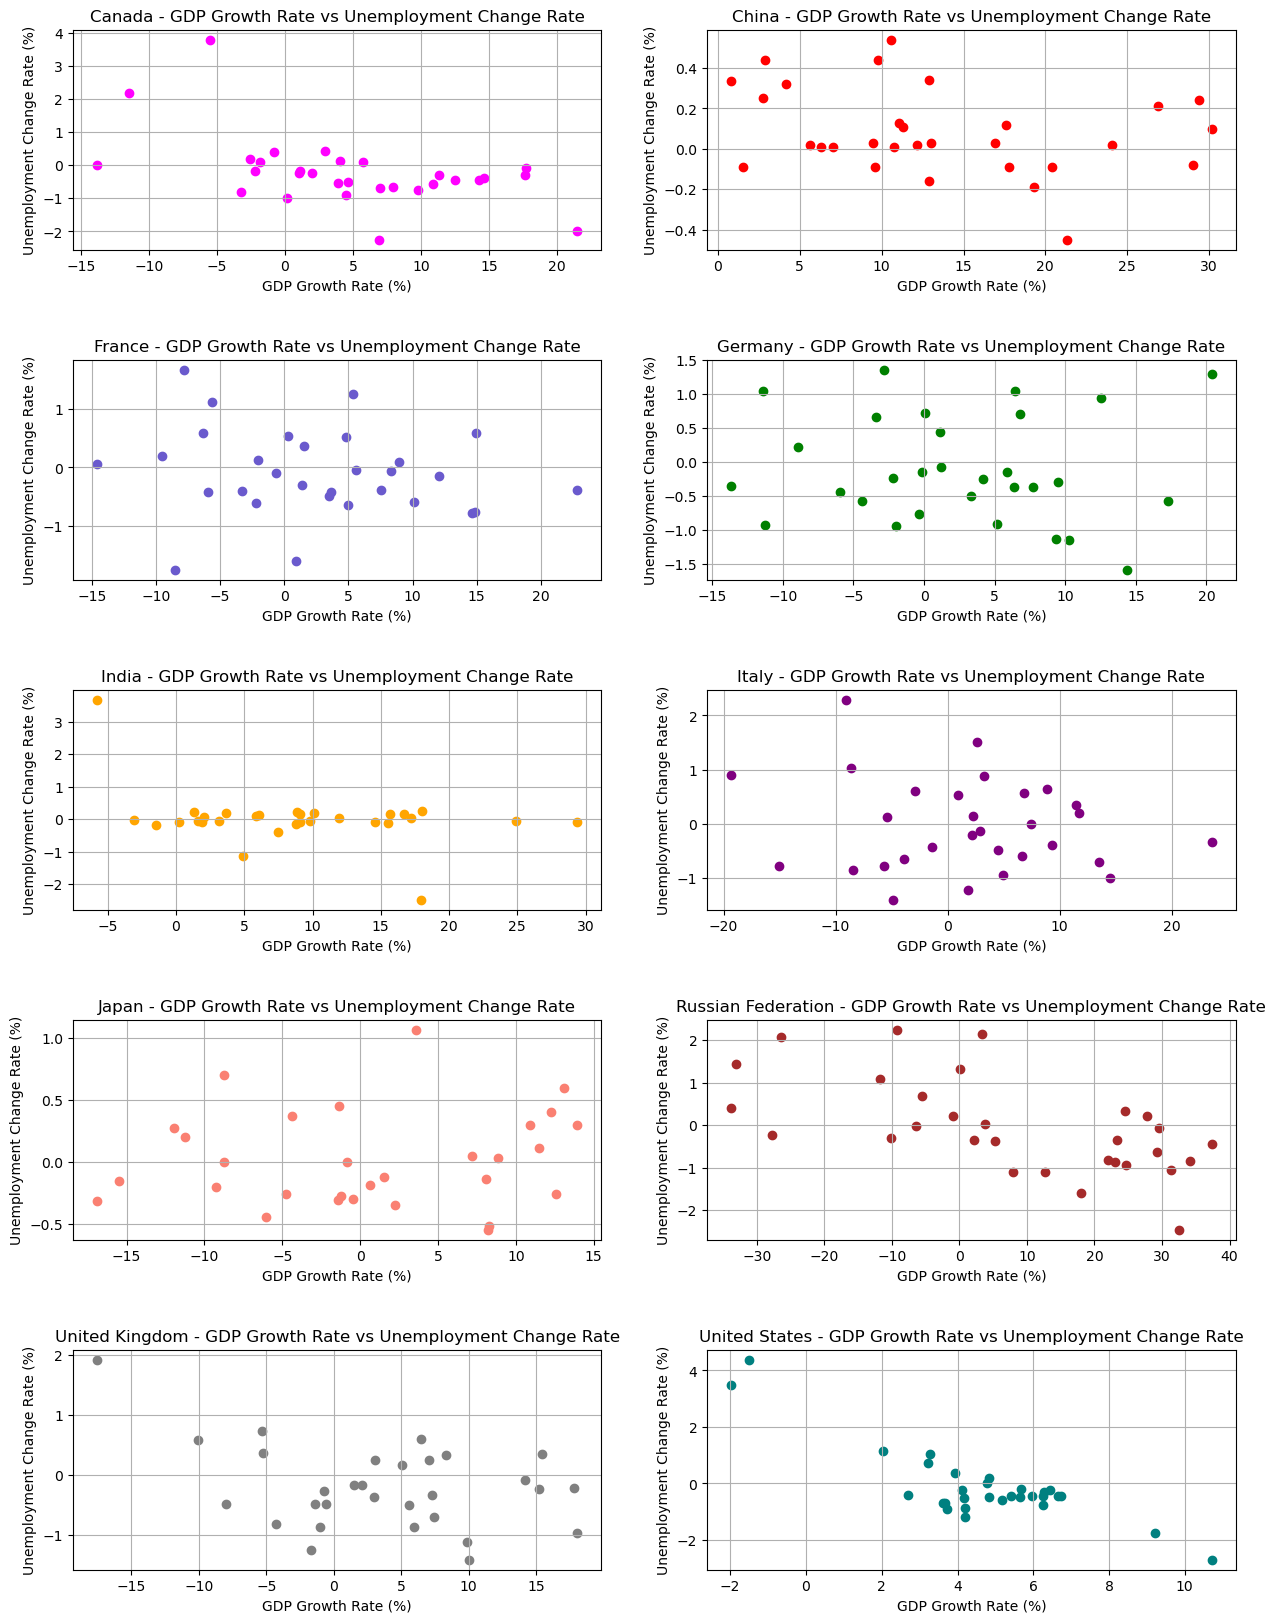

In [14]:
gdp_data['Unemployment Change Rate'] = gdp_data.groupby('Country')['Unemployment Rate'].diff()

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for ax, (country, color) in zip(axes.flatten(), zip(gdp_data['Country'].unique(), colors10)):
    country_data = gdp_data[gdp_data['Country'] == country]
    ax.scatter(country_data['GDP Growth Rate'], country_data['Unemployment Change Rate'], color=color)
    ax.set_title(f"{country} - GDP Growth Rate vs Unemployment Change Rate")
    ax.set_xlabel('GDP Growth Rate (%)')
    ax.set_ylabel('Unemployment Change Rate (%)')
    ax.grid(True)

plt.show()